In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
def sin(x, T=1000):
    return np.sin(2.0 * np.pi * x / T)

# sin波にノイズを付与する
def toy_problem(T=1000, ampl=0.05):
    x = np.arange(0, 2 * T + 1)
    noise = ampl * np.random.uniform(low=-1.0, high=1.0, size=len(x))
    return sin(x) + noise

f = toy_problem()

In [0]:
def make_dataset(low_data, n_prev=100):

    data, target = [], []
    maxlen = 250

    for i in range(len(low_data)-maxlen):
        data.append(low_data[i:i + maxlen])
        target.append(low_data[i + maxlen])

    re_data = np.array(data).reshape(len(data), maxlen, 1)
    re_target = np.array(target).reshape(len(data), 1)

    return re_data, re_target


#g -> 学習データ，h -> 学習ラベル
g, h = make_dataset(f)

In [11]:
print(f.shape)
print(g.shape)

(2001,)
(1751, 250, 1)


In [0]:
# モデル構築

# 1つの学習データのStep数(今回は25)
length_of_sequence = g.shape[1] 
in_out_neurons = 1
n_hidden = 300

model = Sequential()
model.add(LSTM(n_hidden, batch_input_shape=(None, length_of_sequence, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
optimizer = Adam(lr=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer)

In [16]:
early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=20)
model.fit(g, h,
          batch_size=300,
          epochs=100,
          validation_split=0.1,
          )

Train on 1575 samples, validate on 176 samples
Epoch 1/100
1575/1575 [==============================] - 4s 3ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 2/100
1575/1575 [==============================] - 4s 3ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 3/100
1575/1575 [==============================] - 4s 3ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 4/100
1575/1575 [==============================] - 4s 3ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 5/100
1575/1575 [==============================] - 4s 3ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 6/100
1575/1575 [==============================] - 4s 3ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 7/100
1575/1575 [==============================] - 4s 3ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 8/100
1575/1575 [==============================] - 4s 3ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 9/100
1575/1575 [==============================] - 4s 3ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 10/100
1575/1575 [==

In [0]:
# 予測
predicted = model.predict(g)

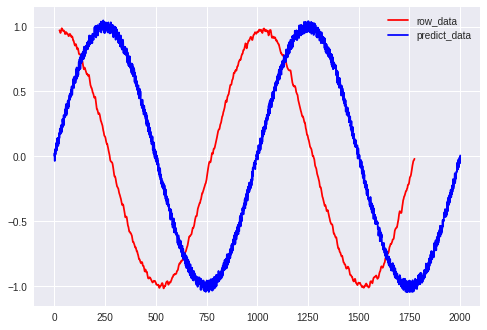

In [18]:
plt.figure()
plt.plot(range(25,len(predicted)+25),predicted, color="r", label="row_data")
plt.plot(range(0, len(f)), f, color="b", label="predict_data")
plt.legend()
plt.show()

In [0]:
# 1つの学習データの時間の長さ -> 25
time_length = future_test.shape[1]
# 未来の予測データを保存していく変数
future_result = np.empty((1))

# 未来予想
for step2 in range(400):

    test_data = np.reshape(future_test, (1, time_length, 1))
    batch_predict = model.predict(test_data)

    future_test = np.delete(future_test, 0)
    future_test = np.append(future_test, batch_predict)

    future_result = np.append(future_result, batch_predict)


# sin波をプロット
plt.figure()
plt.plot(range(25,len(predicted)+25),predicted, color="r", label="predict_data")
plt.plot(range(0, len(f)), f, color="b", label="row_data")
plt.plot(range(0+len(f), len(future_result)+len(f)), future_result, color="g", label="future_predict")
plt.legend()
plt.show()

NameError: ignored